In [33]:
import numpy, scipy.io
import scipy.integrate
import matplotlib.pyplot as plt
from operator_functions.pointer_func import pointer_vector

In [4]:

#siin paneme paika vajalikud parameetrid
punktide_arv=256
salv=.01 #kui tiheda sammuga salvestan
tf=0.1 #lppaeg
atol=1e-12
rtol=1e-10
nsteps=1e7
integrator='vode'
#momg vajalikud raamatukogud


In [58]:
def psm_start(punktide_arv,salv,tf,atol,rtol):
    dx=(1*2*numpy.pi/punktide_arv)
    #sisuliselt omega, et tuletisi vtta
    abi=numpy.hstack((numpy.arange(punktide_arv/2),numpy.arange(-punktide_arv/2,0)))
    suurK=abi
    for i in range(punktide_arv-1):
        suurK=numpy.vstack((suurK,abi))
    #omega transponeeritud, et tuletisi vtta y'st
    suurL=suurK.swapaxes(0,1)
    #print 'max,min',numpy.max(suurKP),numpy.min(suurKP)
    x=dx*numpy.arange(-punktide_arv/2,punktide_arv/2)
    y=x
    xx,yy=numpy.meshgrid(x,y)
    u0=numpy.exp(-(xx**2+yy**2)*25.0)
    #nd siis integreeerima!
    print('integreerin ',integrator,"'ga", u0.shape)
    solver=scipy.integrate.ode(funktsioon).set_integrator(integrator,nsteps=nsteps,atol=atol, rtol=rtol)
    1
    u0 = u0.flatten ()
    solver.set_initial_value(u0, 0).set_f_params(suurK,suurL)
    lahend=[u0.copy()]
    tv=[0,]
    counter=0
    while solver.t< tf:#solver.successful() and solver.t < tf:
        counter+=1
        solver.integrate(solver.t + salv)
        print(numpy.min(solver.y), numpy.max(solver.y))
        ucurrent=solver.y
        print(numpy.shape(ucurrent), numpy.max(numpy.abs(ucurrent-u0)))
        #proovisin!
        lahend.append(ucurrent)
        #print numpy.min(ucurrent), numpy.max(ucurrent)
        tv.append(solver.t)
        print('arvutan, aeg: ',solver.t,solver.successful())
        if counter-1>tf/float(salv):
            break
    return u0,suurK,suurL,lahend,x,y,punktide_arv
    #scipy.io.savemat('heat_eq_test_12_04',{'u0':u0,'suurK':suurK,'lahend':lahend,'tv':tv,'x':x\
    #,'y':y,'punktide_arv':punktide_arv})


In [83]:
xxyy=numpy.concatenate((x.reshape((len(x),1)),y.reshape((len(y),1))),axis=1)

In [100]:
xxyy=numpy.array(numpy.meshgrid(x,y))

In [99]:
xxyy.shape

(2, 256, 256)

In [103]:

def funktsioon(t,xxyy,suurK,suurL):
#kasuta seda integreerimiseks!

    a=1
    #xxyy = numpy.reshape( xxyy, (punktide_arv,)*2)
    #print 'SIIN!!!'
    #print '================================================================'
    uxx=numpy.real(numpy.fft.ifft(-suurK**2*numpy.fft.fft(xxyy,axis=1),axis=1))
    uyy=numpy.real(numpy.fft.ifft(-suurL**2*numpy.fft.fft(xxyy,axis=0),axis=0))
    tul=a*(uxx+uyy)
    #print 'sain tulemuse:', tul.shape
    #print max(tul),min(tul)
    return tul.flatten()


In [111]:
solution=funktsioon([i for i in range(12)],xxyy,suurK,suurL)

In [59]:
u0,suurK,suurL,lahend,x,y,punktide_arv=psm_start(punktide_arv,salv,tf,atol,rtol)

integreerin  vode 'ga (256, 256)
-7.283267629357645e-13 0.5000000008811903
(65536,) 0.49999999911880966
arvutan, aeg:  0.01 True
-3.432287509788131e-13 0.3333333334964714
(65536,) 0.6666666665035286
arvutan, aeg:  0.02 True
-1.7632764792952669e-13 0.2500000000452656
(65536,) 0.7499999999547344
arvutan, aeg:  0.03 True
-3.3345280871303893e-13 0.20000000001741305
(65536,) 0.799999999982587
arvutan, aeg:  0.04 True
-3.157585099915619e-13 0.1666666665303205
(65536,) 0.8333333334696795
arvutan, aeg:  0.05 True
-9.658603298647953e-14 0.14285714244466394
(65536,) 0.857142857555336
arvutan, aeg:  0.060000000000000005 True
-5.469050732810873e-13 0.1249999993117044
(65536,) 0.8750000006882956
arvutan, aeg:  0.07 True
-1.929574823399362e-13 0.11111110997386604
(65536,) 0.8888888900261339
arvutan, aeg:  0.08 True
-9.284788219419614e-14 0.0999999988627242
(65536,) 0.9000000011372757
arvutan, aeg:  0.09 True
-4.694594160630047e-13 0.09090908992438988
(65536,) 0.9090909100756102
arvutan, aeg:  0.0999

In [56]:
suurK

array([[ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       ...,
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.],
       [ 0.,  1.,  2., ..., -3., -2., -1.]])

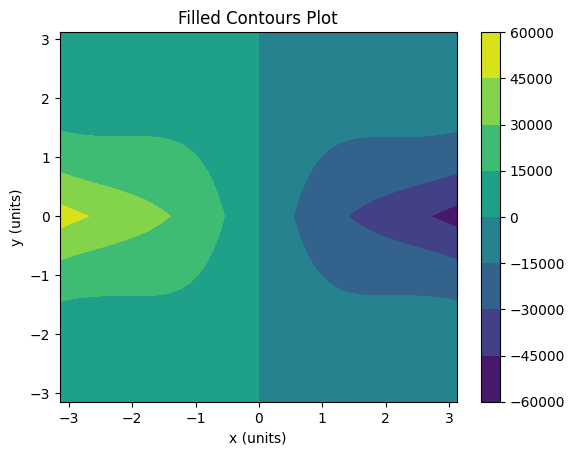

In [112]:
Mat_sol=numpy.zeros((len(x),len(y)))
iQ=pointer_vector(len(x),len(y))
for i in range(0,(len(x))):
    for j in range(0,len(y)):
        p=solution.copy()
        Mat_sol[i,j] =p[iQ[i, j]]
        
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, Mat_sol)
fig.colorbar(cp)
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [42]:
.shape

(65536,)

In [40]:
punktide_arv

256